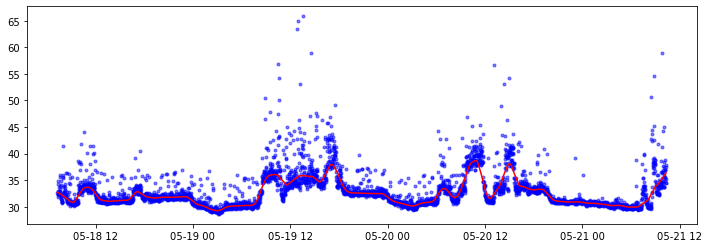

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import sys
from pykalman import KalmanFilter

cpu_data = pd.read_csv('sysinfo.csv')
cpu_data["timestamp"] = pd.to_datetime(cpu_data["timestamp"])
plt.figure(figsize=(12, 4))
plt.plot(cpu_data['timestamp'], cpu_data['temperature'], 'b.', alpha=0.5)
loess_smoothed = lowess(cpu_data['temperature'], 
	cpu_data['timestamp'], frac=.025)
plt.plot(cpu_data['timestamp'], loess_smoothed[:, 1], 'r-')

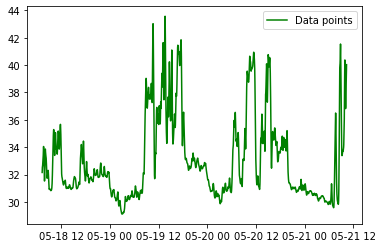

In [22]:
kalman_data = cpu_data[['temperature', 'cpu_percent', 'sys_load_1', 'fan_rpm']]
initial_state = kalman_data.iloc[0]
observation_covariance = np.diag([.3,.3,.3,.3]) ** 2 # TODO: shouldn't be zero
transition_covariance = np.diag([0.01, 0.01, 0.01, 0.01]) ** 2 # TODO: shouldn't be zero
transition = [[0.97, 0.5, 0.2, -0.001],
             [0.1, 0.4, 2.2, 0],
             [0, 0, 0.95, 0],
             [0, 0, 0, 1]]

kf = KalmanFilter(initial_state_mean=initial_state,
                 initial_state_covariance=observation_covariance,
                 observation_covariance=observation_covariance,
                 transition_covariance=transition_covariance,
                 transition_matrices=transition)
kalman_smoothed, state_cov_ = kf.smooth(kalman_data)
plt.plot(cpu_data['timestamp'], kalman_smoothed[:, 0], 'g-')
plt.legend(['Data points','LOESS-Smoothed', 'Kalman-Smoothed'])

plt.savefig('cpu.svg') # for final submission
